In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
dataset_path = "./"
img_size = (128, 128)
batch_size = 32


In [2]:

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 744 images belonging to 2 classes.
Found 186 images belonging to 2 classes.


In [4]:

# Build ANN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save model
model.save("leaf_disease_classifier.h5")


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - accuracy: 0.4728 - loss: 4.7216 - val_accuracy: 0.5161 - val_loss: 1.0625
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.5929 - loss: 1.1229 - val_accuracy: 0.5269 - val_loss: 0.7650
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.6554 - loss: 0.6363 - val_accuracy: 0.5323 - val_loss: 1.0232
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.6205 - loss: 0.6756 - val_accuracy: 0.5591 - val_loss: 0.6736
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7098 - loss: 0.5205 - val_accuracy: 0.7312 - val_loss: 0.5582
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7916 - loss: 0.4072 - val_accuracy: 0.7151 - val_loss: 0.5642
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.7401 - loss: 0.5142 - val_accuracy: 0.7312 - val_loss: 0.5419
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7810 - loss: 0.4681 - val_accuracy: 0

In [5]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
model = load_model("leaf_disease_classifier.h5")

In [6]:
img_path = "pot_hel.JPG"  
img = image.load_img(img_path, target_size=(128, 128))

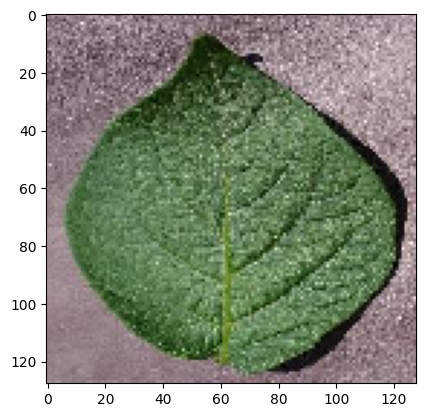

In [11]:
import matplotlib.pyplot as plt 
plt.imshow(img)

In [7]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array /= 255.0  

In [9]:

prediction = model.predict(img_array)


if prediction[0][0] > 0.5:
    print("It's a Unhealthy! 🐶")
else:
    print("It's a Healthy! 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
It's a Healthy! 🐱
